In [116]:
import pandas as pd
import numpy as np
import quandl, math, datetime
import pickle

In [117]:
from sklearn import preprocessing, svm, cross_validation
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style

In [118]:
quandl.api_config.ApiConfig='API_KEY'
df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open','Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High']- df['Adj. Close'])/df['Adj. Close'] * 100.0
df['PCT_Change'] = (df['Adj. Close']- df['Adj. Open'])/df['Adj. Open'] * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(-9999,inplace=True)
forcast_out = int(math.ceil(0.01*len(df)))

In [119]:
df['label'] = df[forecast_col].shift(-forcast_out)
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forcast_out]

In [120]:
X_lately = X[-forcast_out:]

In [121]:
df.dropna(inplace=True)

In [122]:
y = np.array(df['label'])

In [123]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

In [124]:
clf=LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
with open('linearregression', 'wb') as f:
    pickle.dump(clf,f)

pickle_in = open('linearregression', 'rb')
clf = pickle.load(pickle_in)    

In [125]:
accuracy = clf.score(X_test,y_test)

In [126]:
forcast_set = clf.predict(X_lately)

In [127]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [128]:
df['forcast'] = np.nan
for i in forcast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

In [129]:
df['Adj. Close'].plot()
df['forcast'].plot()

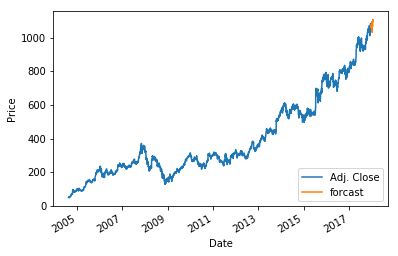

In [130]:
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()